In [1]:
import yfinance as yf
import pandas as pd

def get_stock_data_yahoo(ticker, start="2020-01-01", end="2024-12-31"):
    """
    Downloads historical stock data from Yahoo Finance.
    """
    stock = yf.download(ticker, start=start, end=end)
    stock.reset_index(inplace=True)
    file_name = f"{ticker}_yahoo_data.csv"
    stock.to_csv(file_name, index=False)
    print(f"[INFO] Data for {ticker} saved to '{file_name}'")
    return stock

# Example
df = get_stock_data_yahoo("AAPL")


C:\Users\Rahul\AppData\Local\Temp\ipykernel_8936\2445687107.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed

[INFO] Data for AAPL saved to 'AAPL_yahoo_data.csv'


In [2]:
import pandas as pd
df = pd.read_csv("Stock Prices Data.csv")
print(df.head())
print(df.info())


  Symbol        Date      Open      High       Low     Close    Volume
0    AAL  02-01-2014   25.0700   25.8200   25.0600   25.3600   8998943
1   AAPL  02-01-2014   79.3828   79.5756   78.8601   79.0185  58791957
2    AAP  02-01-2014  110.3600  111.8800  109.2900  109.7400    542711
3   ABBV  02-01-2014   52.1200   52.3300   51.5200   51.9800   4569061
4    ABC  02-01-2014   70.1100   70.2300   69.4800   69.8900   1148391
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Symbol  497472 non-null  object 
 1   Date    497472 non-null  object 
 2   Open    497461 non-null  float64
 3   High    497464 non-null  float64
 4   Low     497464 non-null  float64
 5   Close   497472 non-null  float64
 6   Volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB
None


In [3]:
print(df.isnull().sum())
df_clean = df.dropna()

Symbol     0
Date       0
Open      11
High       8
Low        8
Close      0
Volume     0
dtype: int64


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = df_clean.select_dtypes(include='number').columns
df_clean[num_cols] = scaler.fit_transform(df_clean[num_cols])

C:\Users\Rahul\AppData\Local\Temp\ipykernel_8936\2746866047.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[num_cols] = scaler.fit_transform(df_clean[num_cols])


In [5]:
df_clean.to_csv("cleaned_stock_data.csv", index=False)
print(" Cleaned data saved as 'cleaned_stock_data.csv'")

 Cleaned data saved as 'cleaned_stock_data.csv'


In [6]:
import pandas as pd

# Load your stock data (replace with actual file if different)
df = pd.read_csv("cleaned_stock_data.csv")

# Create a working copy to clean
df_clean = df.dropna().copy()

# Define the IQR outlier removal function
def remove_outliers_iqr(data, feature):
    """
    Filters out extreme values from a given numeric feature
    using the interquartile range (IQR) technique.
    """
    lower_quartile, upper_quartile = data[feature].quantile([0.25, 0.75])
    spread = upper_quartile - lower_quartile
    lower_limit = lower_quartile - 1.5 * spread
    upper_limit = upper_quartile + 1.5 * spread

    return data[(data[feature] >= lower_limit) & (data[feature] <= upper_limit)]

# Apply IQR filtering to all numeric columns
for numeric_col in df_clean.select_dtypes(include='number').columns:
    df_clean = remove_outliers_iqr(df_clean, numeric_col)

# Show the cleaned data
print(df_clean.head())


  Symbol        Date      Open      High       Low     Close    Volume
0    AAL  02-01-2014 -0.603938 -0.599271 -0.601491 -0.601239  0.576425
2    AAP  02-01-2014  0.236597  0.241880  0.236026  0.230325 -0.450789
3   ABBV  02-01-2014 -0.337360 -0.340162 -0.338393 -0.338899  0.038309
4    ABC  02-01-2014 -0.160068 -0.165207 -0.159813 -0.162396 -0.377214
5    ABT  02-01-2014 -0.475626 -0.476314 -0.472826 -0.474405  0.086706


In [7]:
df_clean = pd.get_dummies(df_clean, drop_first=True)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("cleaned_stock_data.csv")
print(df.head())

  Symbol        Date      Open      High       Low     Close    Volume
0    AAL  02-01-2014 -0.603938 -0.599271 -0.601491 -0.601239  0.576425
1   AAPL  02-01-2014 -0.068684 -0.073863 -0.066545 -0.072435  6.624991
2    AAP  02-01-2014  0.236597  0.241880  0.236026  0.230325 -0.450789
3   ABBV  02-01-2014 -0.337360 -0.340162 -0.338393 -0.338899  0.038309
4    ABC  02-01-2014 -0.160068 -0.165207 -0.159813 -0.162396 -0.377214


In [9]:
print(df.describe())

               Open          High           Low         Close        Volume
count  4.974610e+05  4.974610e+05  4.974610e+05  4.974610e+05  4.974610e+05
mean  -2.463598e-16  8.821419e-17  1.787137e-16 -4.067908e-17  2.045381e-17
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00
min   -8.350383e-01 -8.351173e-01 -8.357529e-01 -8.354923e-01 -5.167018e-01
25%   -4.401476e-01 -4.402476e-01 -4.402120e-01 -4.402086e-01 -3.854997e-01
50%   -2.107228e-01 -2.108518e-01 -2.107485e-01 -2.107843e-01 -2.634388e-01
75%    1.188291e-01  1.182389e-01  1.195908e-01  1.187666e-01  2.223503e-03
max    1.929266e+01  1.936090e+01  1.938486e+01  1.934172e+01  7.458320e+01


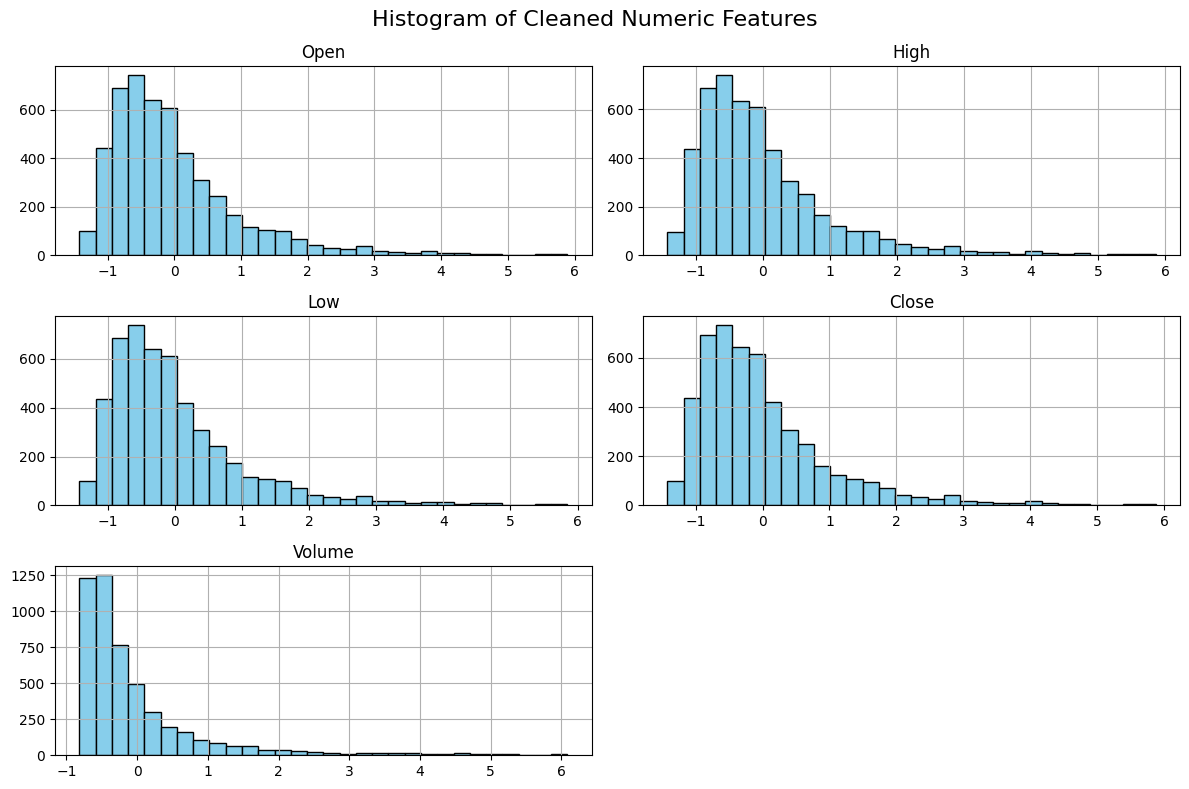

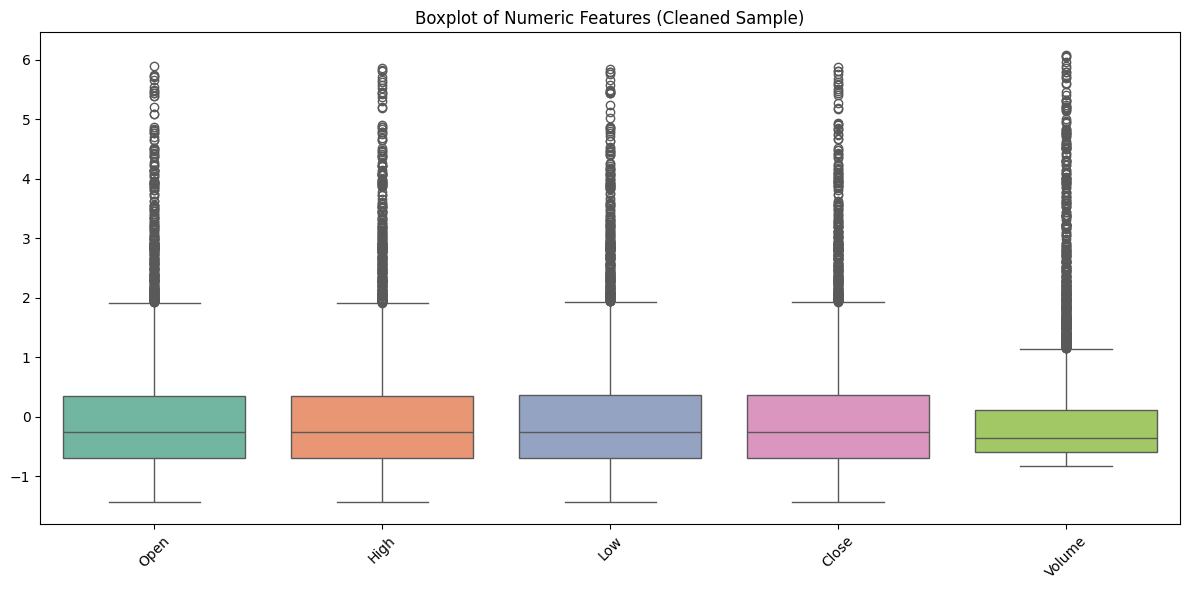

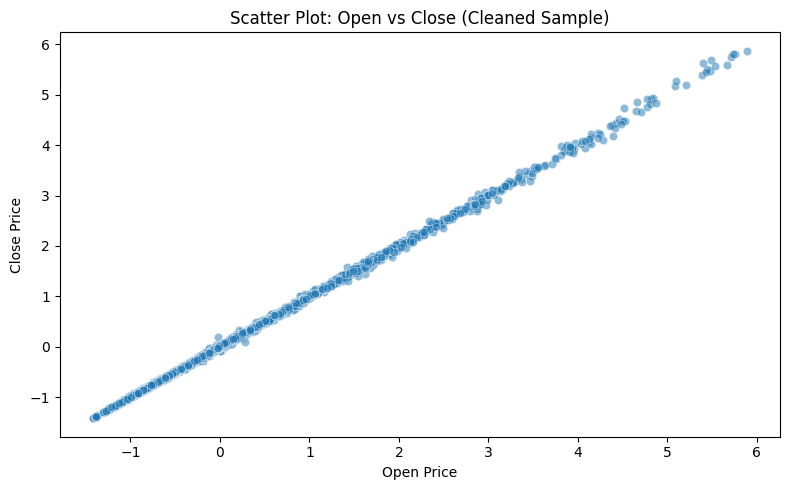

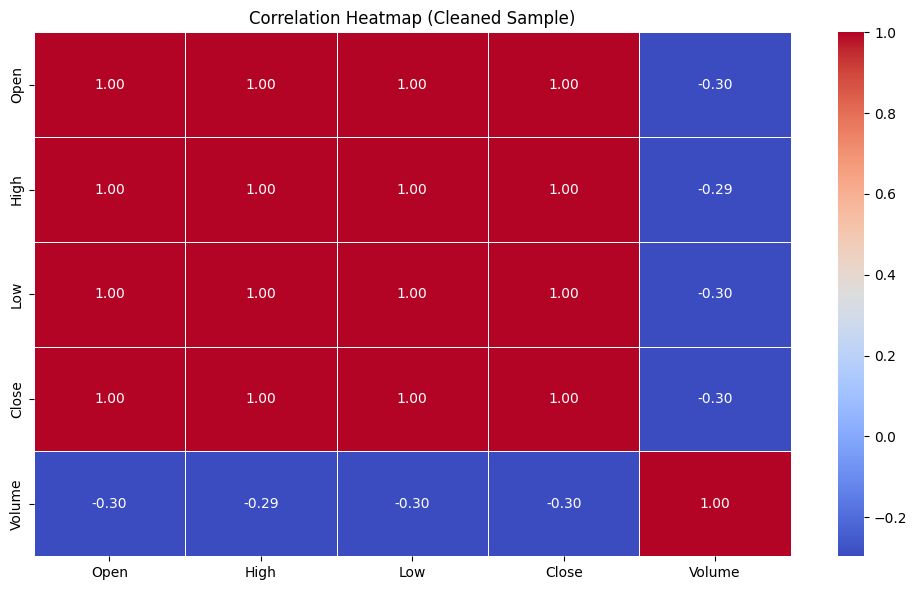

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import zscore

df = pd.read_csv("Stock Prices Data.csv")
df.ffill(inplace=True) 
z_scores = df[['Open', 'High', 'Low', 'Close', 'Volume']].apply(zscore)
outliers = (np.abs(z_scores) > 3).any(axis=1)
df_cleaned = df[~outliers].copy()
le = LabelEncoder()
df_cleaned['Symbol_encoded'] = le.fit_transform(df_cleaned['Symbol'])
scaler = StandardScaler()
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
df_scaled = df_cleaned.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])
df_scaled.to_csv("Cleaned_Stock_Data.csv", index=False)
sample_df = df_scaled.sample(n=5000, random_state=42)
sample_df[numeric_cols].hist(figsize=(12, 8), bins=30, edgecolor='black', color='skyblue')
plt.suptitle("Histogram of Cleaned Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
sns.boxplot(data=sample_df[numeric_cols], palette='Set2')
plt.title("Boxplot of Numeric Features (Cleaned Sample)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# === Scatter Plot: Open vs Close ===
plt.figure(figsize=(8, 5))
sns.scatterplot(data=sample_df, x='Open', y='Close', alpha=0.5)
plt.title("Scatter Plot: Open vs Close (Cleaned Sample)")
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
corr_matrix = sample_df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Cleaned Sample)")
plt.tight_layout()
plt.show()



Linear Regression Results:
MSE: 0.5282
R^2 Score: 0.9999

Decision Tree Results:
MSE: 1.2610
R^2 Score: 0.9999

Random Forest Results:
MSE: 0.6929
R^2 Score: 0.9999


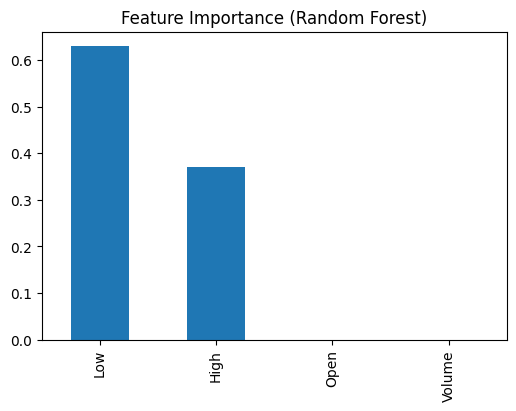

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\n{name} Results:")
    print(f"MSE: {mse:.4f}")
    print(f"R^2 Score: {r2:.4f}")
importances = models['Random Forest'].feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(6,4))
feat_imp.plot(kind='bar')
plt.title("Feature Importance (Random Forest)")
plt.show()

C:\Users\Rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is ava

MSE for ARIMA Forecast on AAPL: 390.9947


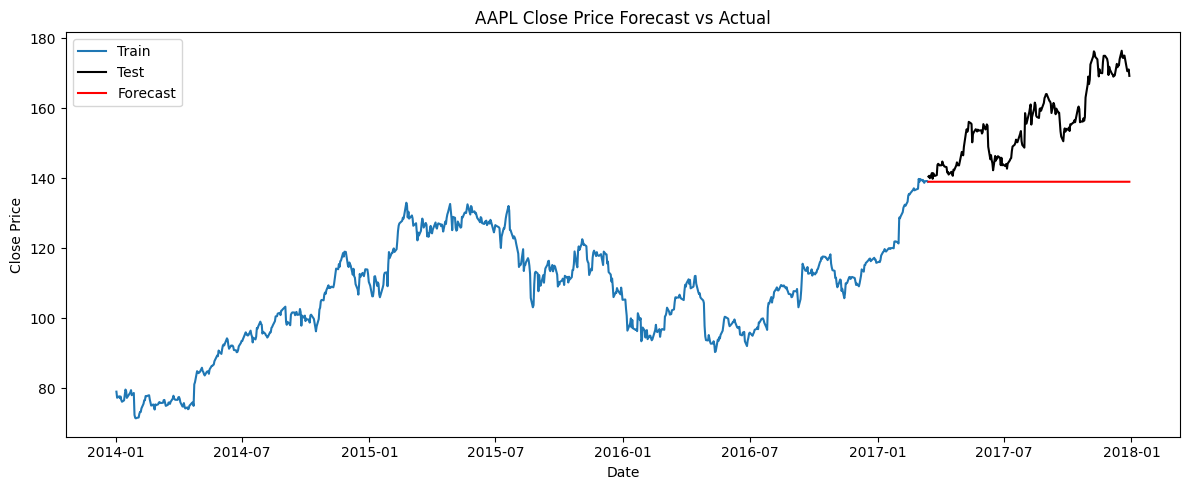

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
df = pd.read_csv("Stock Prices Data.csv")
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
df = df.sort_values("Date")
stock = 'AAPL'
stock_df = df[df['Symbol'] == stock].copy()
stock_df.set_index('Date', inplace=True)
ts = stock_df['Close'].dropna()
train_size = int(len(ts) * 0.8)
train = ts.iloc[:train_size]
test = ts.iloc[train_size:]
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))
mse = mean_squared_error(test.values, forecast.values)
print(f"MSE for ARIMA Forecast on {stock}: {mse:.4f}")

plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color='black')
plt.plot(test.index, forecast, label="Forecast", color='red')
plt.title(f"{stock} Close Price Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans

df = pd.read_csv("cleaned_stock_data.csv")

In [14]:
df.head()

,Symbol,Date,Open,High,Low,Close,Volume,Symbol_encoded
0,AAL,02-01-2014,-0.993171,-0.983629,-0.988916,-0.987917,1.311938,1
1,AAP,02-01-2014,0.615722,0.625584,0.614689,0.603591,-0.713171,2
2,ABBV,02-01-2014,-0.482905,-0.487925,-0.485160,-0.485832,0.251064,4
3,ABC,02-01-2014,-0.143546,-0.153218,-0.143230,-0.148028,-0.568122,5
4,ABT,02-01-2014,-0.747565,-0.748399,-0.742559,-0.745173,0.346476,6


In [15]:
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
features_cls = ['Open', 'High', 'Low', 'Volume']
X_cls = df[features_cls]
y_cls = df['Target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf = LogisticRegression()
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.71      0.74     48666
           1       0.73      0.80      0.76     47826

    accuracy                           0.75     96492
   macro avg       0.75      0.75      0.75     96492
weighted avg       0.75      0.75      0.75     96492

Confusion Matrix:
 [[34430 14236]
 [ 9700 38126]]


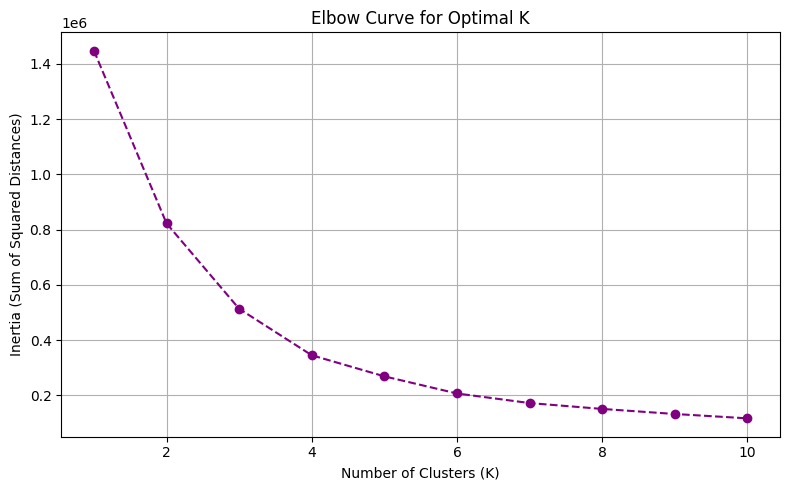

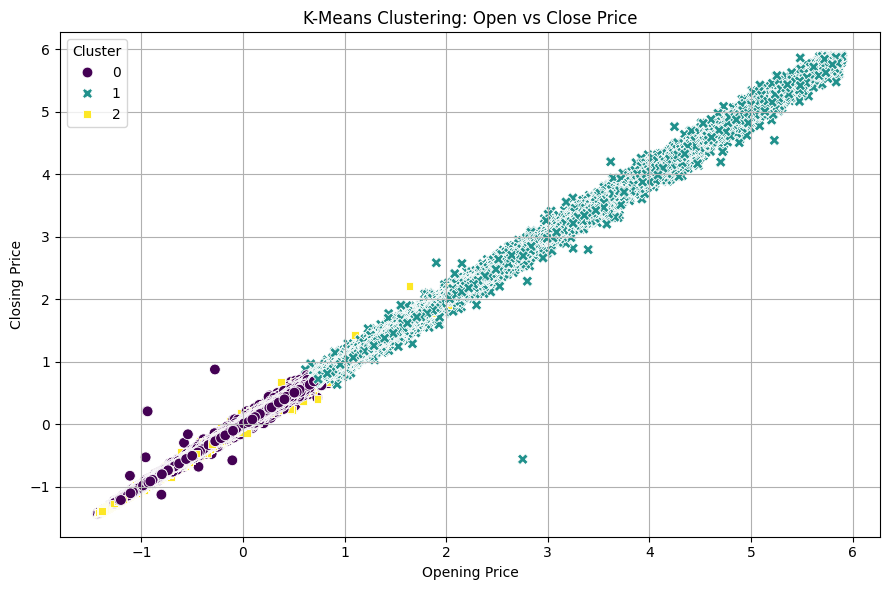

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load cleaned data (already preprocessed)
df_cluster = pd.read_csv("cleaned_stock_data.csv")

# Select numeric features to cluster on (customize as needed)
features_to_cluster = ["Open", "Close", "Volume"]
data_for_clustering = df_cluster[features_to_cluster].dropna()

# Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_for_clustering)

# Determine optimal number of clusters using Elbow Method
def plot_elbow_curve(scaled_data, max_clusters=10):
    """
    Plots the Elbow curve to help choose the optimal number of KMeans clusters.
    """
    inertia_values = []
    for k in range(1, max_clusters + 1):
        model = KMeans(n_clusters=k, random_state=42, n_init=10)
        model.fit(scaled_data)
        inertia_values.append(model.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clusters + 1), inertia_values, marker='o', linestyle='--', color='purple')
    plt.title("Elbow Curve for Optimal K")
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Inertia (Sum of Squared Distances)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot elbow curve
plot_elbow_curve(scaled_features, max_clusters=10)

# Apply KMeans with chosen K (e.g., 3 clusters)
optimal_k = 3
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_model.fit_predict(scaled_features)

# Add cluster labels to original DataFrame
df_cluster["Cluster"] = cluster_labels

# Visualize clusters using Open vs Close
plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=df_cluster,
    x="Open",
    y="Close",
    hue="Cluster",
    palette="viridis",
    style="Cluster",
    s=60
)
plt.title("K-Means Clustering: Open vs Close Price")
plt.xlabel("Opening Price")
plt.ylabel("Closing Price")
plt.legend(title="Cluster", loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Rahul\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.1303 - val_loss: 0.0343
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0126 - val_loss: 0.0111
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0097 - val_loss: 0.0076
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0092 - val_loss: 0.0038
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0083 - val_loss: 0.0094
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0093 - val_loss: 0.0038
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0081 - val_loss: 0.0036
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0077 - val_loss: 0.0038
Epoch 9/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0082 - val_loss: 0.0036
Epoch 10/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0070 - val_loss: 0.0034
Epoch 11/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0078 - val_loss: 0.0029
Epoch 12/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0

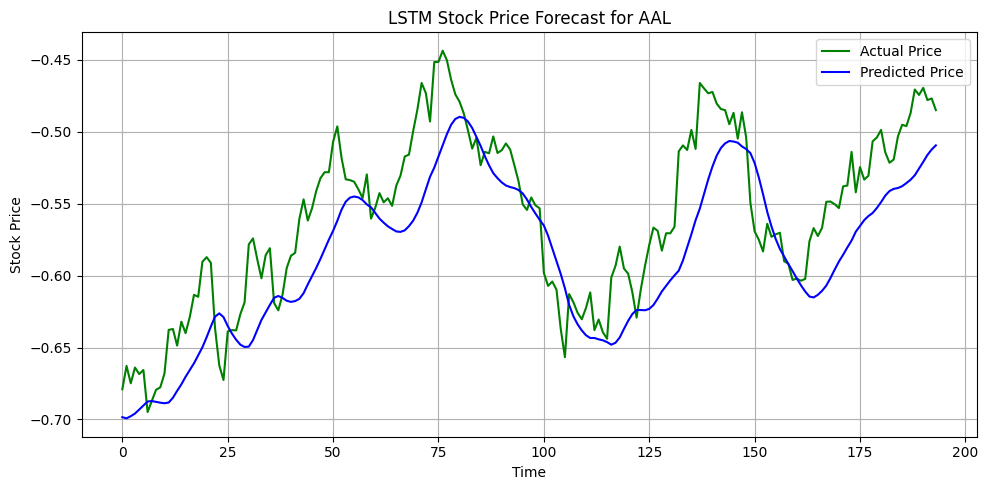

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load cleaned stock data
data = pd.read_csv('cleaned_stock_data.csv')

# Ensure correct formatting
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.sort_values('Date', inplace=True)

# Select a specific symbol for prediction
symbol_name = data['Symbol'].unique()[0]  # You can replace this with a specific ticker
stock_data = data[data['Symbol'] == symbol_name].copy()

# Use 'Close' price for prediction
close_prices = stock_data['Close'].values.reshape(-1, 1)

# Normalize prices using MinMaxScaler
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(close_prices)

# Function to convert timeseries into sequences
def generate_stock_sequences(series, window_size=30):
    X_seq, y_seq = [], []
    for i in range(window_size, len(series)):
        X_seq.append(series[i - window_size:i])
        y_seq.append(series[i])
    return np.array(X_seq), np.array(y_seq)

# Create input sequences
X, y = generate_stock_sequences(scaled_prices, window_size=30)

# Split into train and test sets (no shuffle for time series)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define a custom LSTM model
def create_lstm_forecaster(input_shape):
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(32, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Build and train the model
lstm_model = create_lstm_forecaster((X_train.shape[1], 1))
history = lstm_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=32,
    verbose=1
)

# Predict and reverse scale
predicted_scaled = lstm_model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_scaled)
actual_prices = scaler.inverse_transform(y_test)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 5))
plt.plot(actual_prices, label='Actual Price', color='green')
plt.plot(predicted_prices, label='Predicted Price', color='blue')
plt.title(f'LSTM Stock Price Forecast for {symbol_name}')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()
